In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data=pd.read_csv("cdc_diabetes_health_indicators.csv")

In [4]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [5]:
barebones_features = [
    'Diabetes_binary', 
    'Age',
    'Sex',
    'BMI',
    'HighBP',
    'PhysActivity',
    'Smoker',
    'GenHlth'
]

In [ ]:

df = data[barebones_features]

df = df.dropna()

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']



In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Linear SVM": LinearSVC(class_weight='balanced', max_iter=10000)
}

In [42]:
for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Training: Logistic Regression
Accuracy: 0.7203760643330179
Confusion Matrix:
 [[31164 12575]
 [ 1612  5385]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81     43739
           1       0.30      0.77      0.43      6997

    accuracy                           0.72     50736
   macro avg       0.63      0.74      0.62     50736
weighted avg       0.86      0.72      0.76     50736


Training: Random Forest
Accuracy: 0.739435509303059
Confusion Matrix:
 [[33109 10630]
 [ 2590  4407]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.83     43739
           1       0.29      0.63      0.40      6997

    accuracy                           0.74     50736
   macro avg       0.61      0.69      0.62     50736
weighted avg       0.84      0.74      0.77     50736


Training: Decision Tree
Accuracy: 0.7098312835067802
Confusion Matrix:
 [[31169 1257

In [10]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [11]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Diabetes_binary
0    174595
1     28349
Name: count, dtype: int64
After SMOTE: Diabetes_binary
0    174595
1    174595
Name: count, dtype: int64


In [12]:
for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Training: Logistic Regression
Accuracy: 0.7206125827814569
Confusion Matrix:
 [[31174 12565]
 [ 1610  5387]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81     43739
           1       0.30      0.77      0.43      6997

    accuracy                           0.72     50736
   macro avg       0.63      0.74      0.62     50736
weighted avg       0.86      0.72      0.76     50736


Training: Random Forest
Accuracy: 0.7641713970356354
Confusion Matrix:
 [[34889  8850]
 [ 3115  3882]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85     43739
           1       0.30      0.55      0.39      6997

    accuracy                           0.76     50736
   macro avg       0.61      0.68      0.62     50736
weighted avg       0.83      0.76      0.79     50736


Training: Decision Tree
Accuracy: 0.7701434878587197
Confusion Matrix:
 [[35412  83

In [ ]:

trained_models = {}

for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)
    
    trained_models[name] = model
    



Training: Logistic Regression
Training: Random Forest
Training: Decision Tree
Training: K-Nearest Neighbors
Training: Naive Bayes
Training: Linear SVM


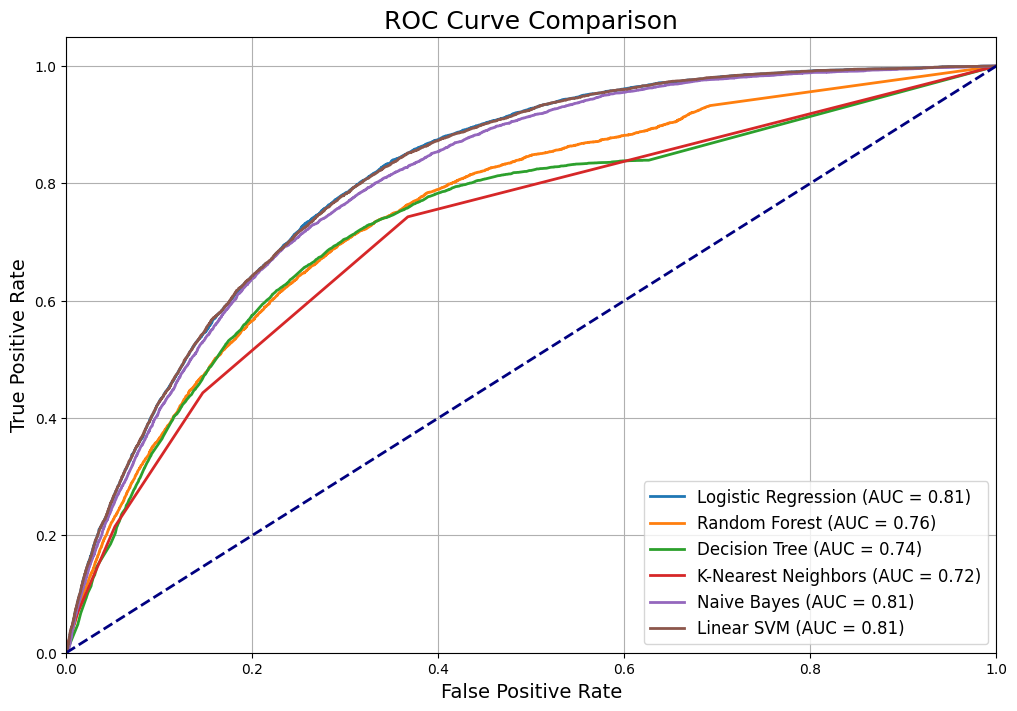

In [47]:
plt.figure(figsize=(12, 8))

for name, model in trained_models.items():
    if hasattr(model, "predict_proba"): 
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.grid()
plt.show()


In [ ]:

X = df[barebones_features[1:]]
y = df[barebones_features[0]]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

linear_svm_model = LinearSVC(random_state=42)
linear_svm_model.fit(X_train_smote, y_train_smote)


y_pred = linear_svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7146

Confusion Matrix:
[[30884 12783]
 [ 1695  5374]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     43667
           1       0.30      0.76      0.43      7069

    accuracy                           0.71     50736
   macro avg       0.62      0.73      0.62     50736
weighted avg       0.86      0.71      0.76     50736



In [ ]:
def predict_diabetes(model, scaler, age, sex, bmi, highbp, physactivity, smoker, genhlth):
    """
    Predict diabetes for a single patient based on input features.
    """
    new_patient = [[age, sex, bmi, highbp, physactivity, smoker, genhlth]]
    
    
    new_patient_scaled = scaler.transform(new_patient)
    
    prediction = model.predict(new_patient_scaled)
    
    if prediction[0] == 1:
        print("⚠️  The patient is likely diabetic.")
    else:
        print("✅  The patient is likely not diabetic.")


In [ ]:

predict_diabetes(
    model=linear_svm_model,
    scaler=scaler,
    age=11,
    sex=0,
    bmi=27,
    highbp=1,
    physactivity=1,
    smoker=0,
    genhlth=3
)

⚠️  The patient is likely diabetic.


C:\Users\slowd\OneDrive\Desktop\Projects\MLProjects\Diabeties\diabeties\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
import joblib

# Save model
joblib.dump(linear_svm_model, 'linear_svm_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Save X_train (small sample is enough for SHAP)
X_train_sample = X_train.sample(100, random_state=42)
joblib.dump(X_train_sample, 'X_train_sample.pkl')


['X_train_sample.pkl']